<a href="https://colab.research.google.com/github/mjvakili/Land_use_classification/blob/master/land_cover_vanila_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **このノートブックについて**

---


本ノートブックは深層学習の最初の第一歩として自学自習や研修等でお使いいただけるよう、元村和史(Kazushi Motomura)が作成、公開しているものです。

自由にお使いいただけますが、よりよいノートブックに出来ればと思っておりますので、使用した感想等を作成者にお寄せ頂けると幸いです。私自身もまだまだ勉強中ですので、是非よろしくお願いいたします。

このノートブックはPythonの基本的なコードで書かれてはいるものの、その使い方を一行一行解説するものではありません。
ただし、特に知識がなくてもGoogleColabratry上で「Shift+Enter」を連打すればとにかく動くように作っています。動いている深層学習モデルを触って動かすことが出来るので、Pythonにそこまで馴染みがなくても、「何となく」深層学習モデルを作成して、動かしてみることができます。(試しに「Shift+Enter」を連打して最後まで進めてみてください)

何となく動いてしまうので、馴染みのない方は気持ち悪く感じるかもしれませんが、まさにそれが入り口です。このノートブックに書かれているコードは基本的なものばかりですので1行1行何をしているのか調べながら追っていただくことで、Pythonの勉強の導入としてお使いいただけると思います。

本ノートブックの作成に当たって参考にしたサイト等は以下です。是非ご活用ください。

*   https://github.com/LinguoLi/mnist_tutorial
*   https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
* https://github.com/yashk2810/MNIST-Keras



# **このノートブックで動くもの**
---
このノートブックでは「手書き文字認識」データセットであるMNISTを使って、**手書きの文字（数字）が何の数字かを判定する全結合ニューラルネットワークの学習から予測、結果の確認**まで行うことが出来ます。

# **このノートブックの構成**
---
このノートブックは以下の構成になっています。

1. Colabのセットアップと操作確認
2. 学習データとテストデータ
3. データの様々な前処理
4. 深層学習モデルの構築
5. 学習・後処理・評価
6. 精度向上にチャレンジ

各セルに[Work]と入っているセルは、少しコードの中身を変更してみるパートです。是非ご自身で手を動かしてみてください。




# **Colabのセットアップと操作確認**
---

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Colaboratory とは</h1>

Colaboratory（略称: Colab）は、ブラウザから Python を記述、実行できるサービスです。次の特長を備えています。
- 環境構築が不要
- GPU への無料アクセス
- 簡単に共有

詳しくは、<a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab の紹介動画</a>をご覧ください。下のリンクからすぐに使ってみることもできます。

(参考)https://colab.research.google.com/notebooks/welcome.ipynb?hl=ja

## **Colabのセットアップ**

ここではColabのセットアップを行います。セットアップといってもほとんど操作は必要ありません。


1.   ノートブックのアップロード

<a href="https://colab.research.google.com/notebooks/">GoogleColab</a>にアクセスして、このノートブックをアップロードします。「ファイルの選択」からこのノートブックを選択してください。

トップ画面で以下の画面が表示されない場合は、「ファイル＞ノートブックをアップロード」でノートブックを選択してください。

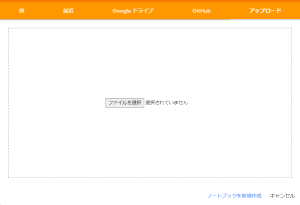


2. ノートブックの設定

ノートブックが開いたら「ランタイム＞ランタイムのタイプを変更」を選択してください。

選択すると以下の画面が表示されるので「ハードウェアアクセラレータ」を「GPU」にセットしてください。

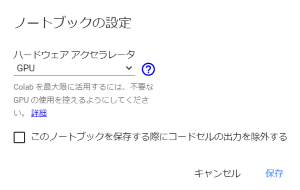

## **Colabの基本的な使い方**

キーボードの**「Shift + Enter」でコードを実行**することができます。
一つ実行してみましょう。

以下のコードを実行すると「ようこそ」と出力されます。

In [2]:
print("ようこそ")

ようこそ


### **[Work]コード実行の確認**

好きな言葉を””の間に入れると好きな言葉を表示させることが出来ます。

In [3]:
print("好きな言葉をこの部分に入力して動作を確認してください")

好きな言葉をこの部分に入力して動作を確認してください


# **【前処理】学習データとテストデータ**
---


## **データの分割**
一般に深層学習ではデータは学習時に用いるデータと、学習の結果を評価するデータに分割して使用します。学習のために用いるデータは「学習データ」、評価に用いるデータは「テストデータ」と呼ばれます。使用するデータの20％程度を「テストデータ」とすることが多いですが、データの状況等により適宜変更される場合もあり、例えば数万のデータが取得される場合は1％とすることもあります。
- **学習用データ：学習用にセットされたデータ。**他のデータに比べて数が多いことが多い。
- **テストデータ：作成した機械学習モデルの性能を計測（評価）するために用いるデータ。学習には用いない。**
- (開発用データ：学習状況をモニタリングするためのデータ。作成しない場合もある)

（参考）上記は所謂「ホールドアウト」といわれるデータの分け方で、テストデータは予めとっておいて学習する際には使わないデータです。ホールドアウト法のほか、クロスバリデーション法という学習とテストデータを取り替えながら平均的に評価する方法もあります。

## **MNISTについて**
今回はMNISTというデータセットを使います。MNISTは手書き数字画像６００００枚とテスト画像１００００枚を集めた画像データセットです。機械学習、特に深層学習の入門用データセットとして非常に有名で、誰しも一度は通るデータセットです。

こんな感じのデータが入っています。

![代替テキスト](https://ai-coordinator.jp/wp-content/uploads/2017/05/mnist.png)

## **MNISTのインポート**
MNISTはあらかじめダウンロードして利用することもできますが、今回はGoogleColabに直接ダウンロードして使用します。


MNISTをロードします。



In [4]:
import tensorflow as tf #TensorFlowのロード
mnist = tf.keras.datasets.mnist #MNISTデータセットのセット

ロードしたMNISTを扱い易い配列に入れます。
*   x_train : 学習用の入力データ
*   y_train : 学習用の正解データ（x_trainが何の数字かというデータが入っている）


*   x_test : テスト用の入力データ
*   y_test : テスト用の正解データ（x_trainが何の数字かというデータが入っている）




In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #MNIST画像を配列に入れる

11493376/11490434 [==============================] - 0s 0us/step


何枚画像が入っているか確認します。

In [6]:
print("MNISTは",x_train.shape[0]+x_test.shape[0],"枚ロードされました、")#ロードされたMNIST画像枚数を確認する

MNISTは 70000 枚ロードされました、


## **MNISTをロードした配列の大きさを確認する**
ロードした配列の大きさを確認してみましょう。

*   x_train, x_test ：　28×28のMNIST画像が学習用60000枚、テスト用10000枚格納されています。
*   y_train, y_test ：　x_train, x_testに格納されたMNIST画像が何の数字か、学習用60000個、テスト用10000個格納されています。

### **（補足）配列の格納について**
 (60000, 28, 28)の場合、6000枚の画像が28×28の大きさで入っているという意味です。

In [7]:
print("x_train配列の大きさは",x_train.shape,"です。")
print("y_train配列の大きさは",y_train.shape,"です。")
print("x_test配列の大きさは",x_test.shape,"です。")
print("y_test配列の大きさは",y_test.shape,"です。")

x_train配列の大きさは (60000, 28, 28) です。
y_train配列の大きさは (60000,) です。
x_test配列の大きさは (10000, 28, 28) です。
y_test配列の大きさは (10000,) です。


## MNIST画像の表示
ロードしたMNIST画像を確認してみましょう。

表示している画像は 1 です。


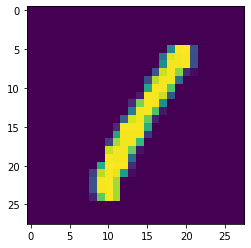

In [8]:
import matplotlib.pyplot as plt
img_num=3
plt.imshow(x_train[img_num,:,:]) #画像を表示する
print("表示している画像は",y_train[img_num],"です。")#表示している画像の数字を確認する。

### [Work]**自分の好きな番号を入力して、MNIST画像を表示してみましょう。**

img_numの数字を好きな数字に変更してみてください。

例）　```img_num = 10000```　を　```img_num = 128```に変更

表示している画像は 3 です。


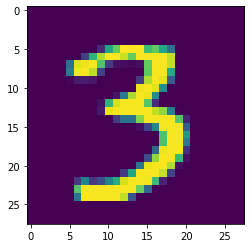

In [9]:
### img_numの数字を自分の好きな数字（60000以下）を設定して確認しましょう

img_num=10000 #任意の画像番号

###

### ↓操作しないでください
plt.imshow(x_train[img_num,:,:]) #画像を表示する
print("表示している画像は",y_train[img_num],"です。")#表示している画像の数字を確認する。
### ↑操作しないでください


少し沢山のMNIST画像を確認してみましょう。

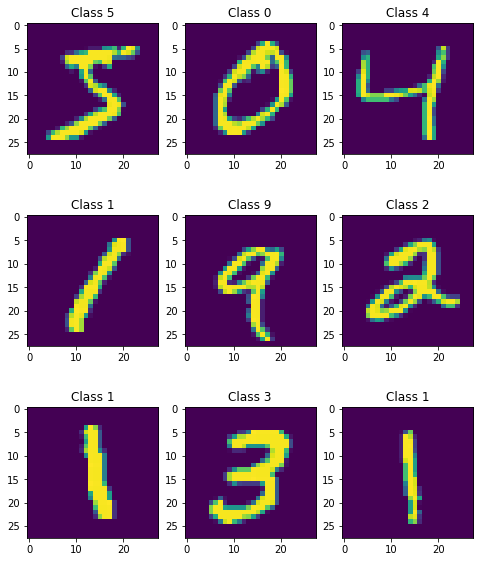

In [13]:
plt.rcParams['figure.figsize'] = (8,10)
for i in range(0,9,1):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# **【前処理】データの様々な前処理**
---
モデルが学習しやすくするために前処理を施します。

## 正規化する
通常MNISTの画像は各ピクセル毎に0～255の256諧調（8bit）で濃淡を表すデータが格納されています。この各ピクセルの値を0～1の間に収まるように255で割っておきます。こうしたデータの値の範囲（スケール）を揃える処理を正規化といいます。正規化する理由は深層学習モデルの学習効率を上げるためです。

学習するデータによってはデータの値の範囲（スケール）が異なるデータが混在する場合があり、正規化はそうした場合に特に効果があります。
例えば65536諧調（16bit）の画像場合、各ピクセル値は0～65535の範囲の値となり、8bitよりも非常に大きい値になります。機械学習モデルが学習する際にこうしたスケールの異なるデータが混在すると、深層学習モデルの学習効率が悪くなります。

In [14]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #MNIST画像を正規化

## **One-hotエンコーディング**
y_trainとy_testには「０～９」の数字がそのまま入っています。

数字のままだとモデルで学習しにくいので、OneHotエンコーディングを行います。

OneHotとは数字データを０と１に変換し、１の場所によって表す方法です。

少しわかりにくいので例を見てください。

例えば[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]がそれぞれの場所だとすると、

* 「０」は「1,0,0,0,0,0,0,0,0,0」
* 「３」は「0,0,1,0,0,0,0,0,0,0」
* 「８」は「0,0,1,0,0,0,0,0,1,0」

といったような形で、10個ゼロを並べてどの位置が1になるかで「0～9」の数字を表す方法です。


試しに一つみてみましょう。

In [15]:
y_train[0] #一番目のデータをみる

5

以下のコードでデータを変換しておきます。

In [16]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

ひとつ確認してみましょう

In [17]:
img_num=10000
print("元の数字は", y_train[img_num], "です。")
print("どの位置が1になっているかで数字を表現しています。")
print("[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]")
print(Y_train[img_num])

元の数字は 3 です。
どの位置が1になっているかで数字を表現しています。
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### **[Work]OneHotエンコーディングを確認してみましょう**


In [18]:
### img_numの数字を自分の好きな数字（60000以下）を設定して確認しましょう

img_num=2000 #任意の画像番号

###
print("元の数字は", y_train[img_num], "です。")
print("どの位置が1になっているかで数字を表現しています。")
print("[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]")
print(Y_train[img_num])

元の数字は 5 です。
どの位置が1になっているかで数字を表現しています。
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## **次元を追加する**
今回扱う深層学習モデルに入力するために次元を追加します。

先ず、先ほどと同じように今のデータの大きさを確認します。

In [19]:
print("x_train配列の大きさは",x_train.shape,"です。")
print("y_train配列の大きさは",y_train.shape,"です。")
print("x_test配列の大きさは",x_test.shape,"です。")
print("y_test配列の大きさは",y_test.shape,"です。")

x_train配列の大きさは (60000, 28, 28) です。
y_train配列の大きさは (60000,) です。
x_test配列の大きさは (10000, 28, 28) です。
y_test配列の大きさは (10000,) です。


配列に次元を追加する処理を行います。

In [20]:
# (60000, 28, 28)を(60000, 28, 28, 1)に次元を追加
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [21]:
print("x_train配列の大きさは",x_train.shape,"です。")
print("y_train配列の大きさは",y_train.shape,"です。")
print("x_test配列の大きさは",x_test.shape,"です。")
print("y_test配列の大きさは",y_test.shape,"です。")

x_train配列の大きさは (60000, 28, 28, 1) です。
y_train配列の大きさは (60000,) です。
x_test配列の大きさは (10000, 28, 28, 1) です。
y_test配列の大きさは (10000,) です。


x_trainとx_testの配列の次元が変わっています。

これは画像を扱う際に「チャンネル」を考慮する必要があるためです。

カラー画像の場合、RGBのそれぞれの色を合成してカラーを表現しています。R・G・Bそれぞれ1チャンネル、カラー画像は合計3チャンネルで画像を構成します。

(60000, 28, 28, 1)の場合、6000枚の画像が28×28の大きさで、1チャンネル入っているという意味です。今回のMNIST画像はモノクロなので1チャンネルであることを明示しただけで、本質的にデータを操作したわけではありません。

## **ベクトル化と型変換**
今回のモデルは画像ではなくベクトルで入力するモデルを想定しているため、ベクトル化をしておきます。

In [22]:
X_train = x_train.reshape(60000, 784).astype('float32')
X_test = x_test.reshape(10000, 784).astype('float32')

型変換をして配列がベクトルになっていることを確認しておきましょう。

In [23]:
print("x_train配列の大きさは",X_train.shape,"です。")
print("y_train配列の大きさは",y_train.shape,"です。")
print("x_test配列の大きさは",X_test.shape,"です。")
print("y_test配列の大きさは",y_test.shape,"です。")

x_train配列の大きさは (60000, 784) です。
y_train配列の大きさは (60000,) です。
x_test配列の大きさは (10000, 784) です。
y_test配列の大きさは (10000,) です。


# **【深層学習モデルの構築】**
---
ここでは深層学習モデルを作成します。

## **ライブラリのインポート**
必要なライブラリをインポートします

In [24]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import numpy as np
import pandas as pd

## **モデルの作成**

今回、使うモデルは３層（入力層・中間層一層・出力層）のニューラルネットワークです。

中間層には３つのノードがあり、出力層は１０個のノードを設定します。出力層が１０個のノードであるのは、入力されたMNIST画像（手書き文字画像）が0～9のどの数字である可能性が高いか出力するためです。

今回設定しているモデルは以下のイメージです。

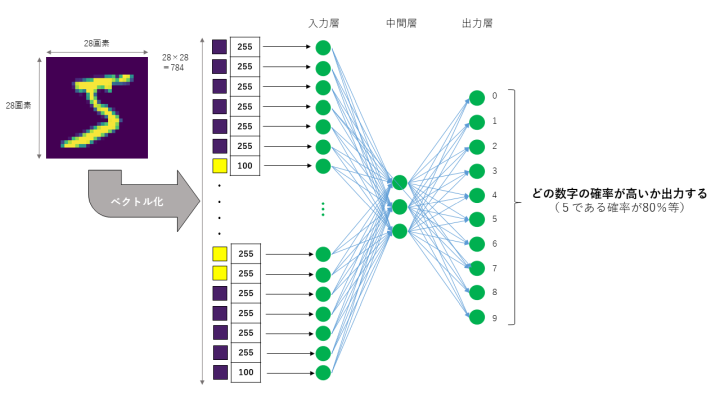


モデル構成をセットしてみましょう。

In [25]:
model = Sequential()
model.add(Dense(3, input_shape=(784,)))
model.add(Activation('relu')) 

model.add(Dense(10))
model.add(Activation('softmax'))

モデルをコンパイルします。

コンパイルする際に、損失関数と最適化手法をセットします。

また今回は正解率で比較するので正解率が出せるようにしておきます。

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **（補足）損失関数と最適化**
* 損失関数：学習結果を評価する指標で、学習時に用いる。モデルが出した答えがどれくらいズレていたかがわかるので、モデルがモデル自身をどれくらい修正するかこの損失関数から判断する。

* 最適化手法：モデルの学習方法（パラメータの更新方法）。損失関数（モデル出力と正解のズレ）に基づいてどの様にモデルを学習させるかというやり方。

* 評価関数：精度などのモデルの性能を表す指標。損失関数と似ているが異なる。

参考：https://qiita.com/omiita/items/1735c1d048fe5f611f80

モデルが正しくセットされているか確認してみましょう。

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 2355      
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________


dense (Dense)とactivation (Activation)のOutput Shapeが３になっており、中間層のノード数が正しく設定されています。

またdense_1 (Dense)とactivation_1 (Activation)は得たい出力である0～9の１０個のノードが正しく設定されています。

# **【学習・後処理・評価】**
---
モデルを学習させます。

学習に当たっては以下の条件で行っています。
*   バッチサイズ：128
*   エポック数：3

In [29]:
model.fit(X_train, Y_train, batch_size=128, epochs=3,verbose=1, validation_data=(X_test, Y_test))

Epoch 1/3
469/469 [==============================] - 4s 4ms/step - loss: 1.7991 - accuracy: 0.3476 - val_loss: 1.0627 - val_accuracy: 0.7107
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 0.9873 - accuracy: 0.7238 - val_loss: 0.8416 - val_accuracy: 0.7675
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.8241 - accuracy: 0.7677 - val_loss: 0.7800 - val_accuracy: 0.7868


## **学習したモデルの性能の評価**
学習したモデルをテストデータを使って評価してみましょう。「モデルの出力がどれくらい正解したか」という精度が0～1の数値で得られるため、わかりやすく％で示します。

In [30]:
score = model.evaluate(X_test, Y_test)
print("精度は{0:.1f}パーセントです。".format(score[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.7800 - accuracy: 0.7868
精度は78.7パーセントです。


## **間違えた画像を確認する**
どんな数字を間違えたか確認してみましょう。

間違えた数字だけを取り出してみます。
「Actual」カラムが正解の数字、「Predictions」が学習したモデルが出力した結果です。
一番左の数字は画像の通し番号です。

In [31]:
# 間違えた数字だけを取り出す
predictions = model.predict_classes(X_test)
predictions = list(predictions)
actuals = list(y_test)
df = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
df_and = df[(df['Actual'] != df['Predictions'])]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
df_and.head()

,Actual,Predictions
8,5,4
11,6,8
15,5,3
18,3,2
25,0,7


間違えた数字だけを確認してみましょう。

表示している画像は 5 で、 4 と間違えました。


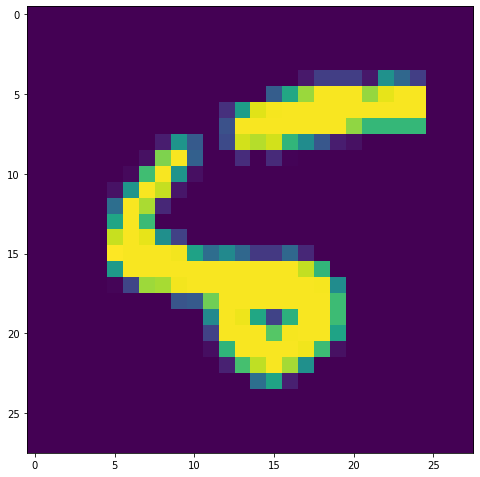

In [33]:
import matplotlib.pyplot as plt
img_num=8
plt.imshow(x_test[img_num,:,:,0]) #画像を表示する
print("表示している画像は",y_test[img_num],"で、",df_and.loc[img_num, 'Predictions'],"と間違えました。")#表示している画像の数字を確認する。

### **[Work]間違えた数字を確認する**
間違えた数字を自分で確認してみましょう。

まず間違えた数字を10個表示します。

In [34]:
df_and.head(10)

,Actual,Predictions
8,5,4
11,6,8
15,5,3
18,3,2
25,0,7
30,3,5
33,4,7
34,7,0
47,2,6
51,3,0


表示した結果の左のカラムの数字を
```img_num = 62```という形で入力して、間違えた数字を確認してみてください。

表示している画像は 5 で、 4 と間違えました。


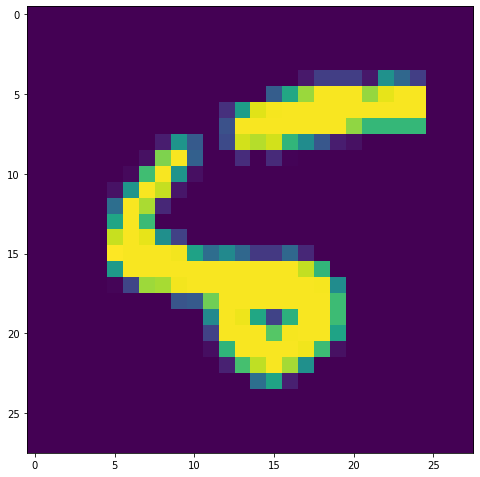

In [36]:
### img_numの数字を自分の好きな数字を設定して確認しましょう

img_num = 8 #任意の画像番号

###
plt.imshow(x_test[img_num,:,:,0]) #画像を表示する
print("表示している画像は",y_test[img_num],"で、",df_and.loc[img_num, 'Predictions'],"と間違えました。")
#表示している画像の数字を確認する。

# **[Work]精度向上にチャレンジ**
---
今日作ったモデルの精度を向上させてみましょう

## **モデル構成を変更して性能を向上させる**

ニューラルネットワークの構成を変更してみます。

モデルのノード数を増やすとモデルの表現力が向上しますので、ノード数を増やしてみましょう。

以下のコードの```node = 3```の３を好きな数字に変更してみてください。

In [37]:
node = 3 #大きな数字にしてみましょう

model = Sequential()
model.add(Dense(node, input_shape=(784,)))
model.add(Activation('relu')) 

model.add(Dense(10))
model.add(Activation('softmax'))

## **モデルのコンパイル**
ここで指定しているパラメータは、他のパラメータに対して性能向上に寄与しない可能性が比較的高いので、ここでは変更しません。

（ただしOptimizerは変更すると性能が向上する可能性はあります。）

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **モデルの学習と出力を工夫する**
モデルを学習させる際のパラメータを変更してみましょう。

前回の学習では以下の条件で学習させていましたが、この数字を変更してみます。
*   バッチサイズ：128
*   エポック数：3

```
batch_num = 128
epoch_num = 3
```
の128と3の数字をそれぞれ大きな値に変更してみてください。


In [39]:
batch_num = 128
epoch_num = 3

In [40]:
model.fit(X_train, Y_train, batch_size=batch_num, epochs=epoch_num, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/3
469/469 [==============================] - 2s 3ms/step - loss: 1.8852 - accuracy: 0.3443 - val_loss: 1.2107 - val_accuracy: 0.6252
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 1.0873 - accuracy: 0.6718 - val_loss: 0.8756 - val_accuracy: 0.7341
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.8517 - accuracy: 0.7465 - val_loss: 0.7863 - val_accuracy: 0.7700


## **学習したモデルの性能の評価する**
学習したモデルを評価してみましょう。

In [41]:
score = model.evaluate(X_test, Y_test)
print("精度は{0:.1f}パーセントです。".format(score[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.7863 - accuracy: 0.7700
精度は77.0パーセントです。


## **間違えた画像を確認する**
どんな数字を間違えたか確認してみましょう。

In [42]:
# 間違えた数字だけを取り出す
predictions = model.predict_classes(X_test)
predictions = list(predictions)
actuals = list(y_test)
df = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
df_and = df[(df['Actual'] != df['Predictions'])]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [43]:
df_and.head()

,Actual,Predictions
8,5,6
15,5,8
18,3,5
32,3,8
33,4,6


間違えた数字だけを確認してみましょう。

表示している画像は 5 で、 6 と間違えました。


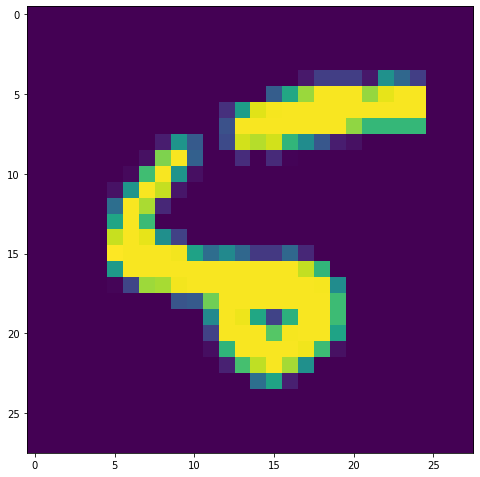

In [44]:
##変更する

img_num=8

###

plt.imshow(x_test[img_num,:,:,0]) #画像を表示する
print("表示している画像は",y_test[img_num],"で、",df_and.loc[img_num, 'Predictions'],"と間違えました。")#表示している画像の数字を確認する。

# **[ミニコンペ]さらなる精度向上**

さらなる精度向上を試してみましょう。

これまで実施した
*   ノード数の変更
*   エポック数の変更
*   バッチサイズの変更

以外にも「全結合層を増やす」等が考えられます。

自分で色々変更して100％を目指して精度向上してみましょう。

In [45]:
node = 3 #ノード数の変更

model = Sequential()
model.add(Dense(node, input_shape=(784,)))
model.add(Activation('relu')) 

# model.add(Dense(node, input_shape=(784,)))
# model.add(Activation('relu')) 

model.add(Dense(10))
model.add(Activation('softmax'))

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.fit(X_train, Y_train, batch_size=128, epochs=3, verbose=1, validation_data=(X_test, Y_test))
# エポック数の変更：epochs=3の数字を変更する
# バッチサイズの変更： batch_size=128の数字を変更する

Epoch 1/3
469/469 [==============================] - 2s 3ms/step - loss: 1.9075 - accuracy: 0.3002 - val_loss: 1.2800 - val_accuracy: 0.5617
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 1.1892 - accuracy: 0.5906 - val_loss: 1.0270 - val_accuracy: 0.6597
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 1.0033 - accuracy: 0.6676 - val_loss: 0.9291 - val_accuracy: 0.7065


In [48]:
score = model.evaluate(X_test, Y_test)
print("精度は{0:.1f}パーセントです。".format(score[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.9291 - accuracy: 0.7065
精度は70.6パーセントです。


In [49]:
# 間違えた数字だけを取り出す
predictions = model.predict_classes(X_test)
predictions = list(predictions)
actuals = list(y_test)
df = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
df_and = df[(df['Actual'] != df['Predictions'])]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
df_and.head(10)

,Actual,Predictions
6,4,9
7,9,4
8,5,4
9,9,7
11,6,1
15,5,3
17,7,9
18,3,2
20,9,7
24,4,9


表示している画像は 4 で、 9 と間違えました。


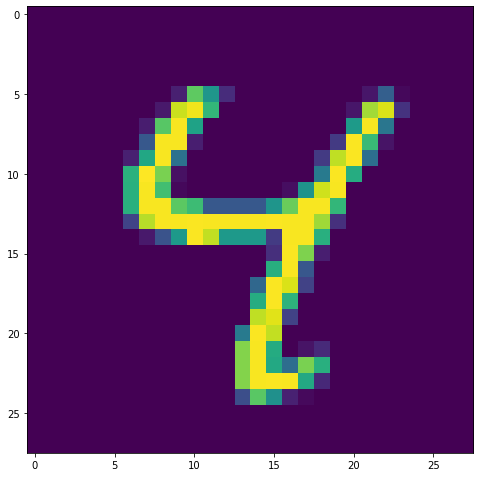

In [51]:
### img_numの数字を自分の好きな数字を設定して確認しましょう

img_num = 6 #任意の画像番号

###
plt.imshow(x_test[img_num,:,:,0]) #画像を表示する
print("表示している画像は",y_test[img_num],"で、",df_and.loc[img_num, 'Predictions'],"と間違えました。")
#表示している画像の数字を確認する。